# Speech Emotion Recognition - Feature Extraction

Databases used

* The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS)
* Toronto emotional speech set (TESS)

### Import Libraries

Import necessary libraries

In [1]:
import glob
import os
import librosa
import time
import numpy as np
import pandas as pd

### Load all files

We will create our numpy array extracting Mel-frequency cepstral coefficients (MFCCs) while the classes to predict will be extracted from the name of the file.

#### Defining emotions to classify 

Selecting the emotions to be classified. Note that the emotions 'neutral', 'calm' and 'surprised' are only found in RAVDESS dataset and 'pleasantly surprised' or 'ps' is only available in TESS dataset. To combine all the emotions from both datasets into 8 emotion classes, we have changed 'pleasantly surprised' to 'surprised' and 'fearful' to 'fear'

In [2]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fear',
  '07':'disgust',
  '08':'surprised'
}

#defined tess emotions to test on TESS dataset only
tess_emotions=['angry','disgust','fear','ps','happy','sad']

##defined RAVDESS emotions to test on RAVDESS dataset only
ravdess_emotions=['neutral','calm','angry', 'happy','disgust','sad','fear','surprised']

observed_emotions = ['sad','angry','happy','disgust','surprised','neutral','calm','fear']

#### Feature extraction

Using librosa package we can extract the MFCC features. This function loads the file give the file path and after resampling and computing MFCC features, returns the features. We have selected the no. of MFCCs as 40.

In [3]:
def extract_feature(file_name, mfcc):
    X, sample_rate = librosa.load(os.path.join(file_name), res_type='kaiser_fast')
    if mfcc:
        mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((mfccs))
        return result
    else:
        return None

#### Choosing a dataset

Choose the dataset(s) you want to load using the following function

In [4]:
def dataset_options():
    # choose datasets
    ravdess = True
    tess = True
    ravdess_speech = False
    ravdess_song = False
    data = {'ravdess':ravdess, 'ravdess_speech':ravdess_speech, 'ravdess_song':ravdess_song, 'tess':tess}
    print(data)
    return data

#### Load data

Load data from the datasets required which is obtained by calling the function dataset__options(). Extract features from each file with the selected emotions in chosen datasets using the extract_feature() function defined.

In [5]:
def load_data(test_size=0.2): 
    x,y=[],[]
    
    # feature to extract
    mfcc = True
    
    data = dataset_options()
    paths = []
    if data['ravdess']:
        paths.append("kaggle/input/ravdess-emotional-*/audio_*_actors_01-24/*/Actor_*/*.wav")
    elif data['ravdess_speech']:
        paths.append("kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_*/*.wav")
    elif data['ravdess_song']:
        paths.append("kaggle/input/ravdess-emotional-song-audio/audio_song_actors_01-24/Actor_*/*.wav")
        
    for path in paths:
        for file in glob.glob(path):
            file_name=os.path.basename(file)
            emotion=emotions[file_name.split("-")[2]] #to get emotion according to filename. dictionary emotions is defined above.
            if emotion not in observed_emotions: #options observed_emotions - RAVDESS and TESS, ravdess_emotions for RAVDESS only
                continue
            feature=extract_feature(file, mfcc)
            x.append(feature)
            y.append(emotion)
    if data['tess']:
        for file in glob.glob("/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/*AF_*/*.wav"):
            file_name=os.path.basename(file)
            emotion=file_name.split("_")[2][:-4] #split and remove .wav
            if emotion == 'ps':
                emotion = 'surprised'
            if emotion not in observed_emotions: #options observed_emotions - RAVDESS and TESS, ravdess_emotions for RAVDESS only
                continue
            feature=extract_feature(file, mfcc)
            x.append(feature)
            y.append(emotion)
    return {"X":x,"y":y}

In [6]:
start_time = time.time()

Trial_dict = load_data(test_size = 0.3)

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

{'ravdess': True, 'ravdess_speech': False, 'ravdess_song': False, 'tess': True}
--- Data loaded. Loading time: 161.08348083496094 seconds ---


In [7]:
X = pd.DataFrame(Trial_dict["X"])
y = pd.DataFrame(Trial_dict["y"])

In [8]:
X.shape, y.shape

((2800, 40), (2800, 1))

In [9]:
#renaming the label column to emotion
y=y.rename(columns= {0: 'emotion'})

In [10]:
#concatinating the attributes and label into a single dataframe
data = pd.concat([X, y], axis =1)

In [11]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
0,-269.211700,80.701363,2.356568,30.741869,-14.053211,10.920398,1.400163,2.320490,-8.806257,9.335831,...,3.344054,-5.234730,-6.052400,-1.165393,1.364710,-0.193868,0.587787,7.060477,5.522696,fear
1,-344.002502,32.776810,-9.063319,25.326313,0.067531,0.801800,-11.765184,0.075920,-25.511457,4.341536,...,7.770835,2.493593,-6.546103,-7.306666,1.218036,3.636092,-0.963508,0.175110,5.246468,fear
2,-326.832458,43.659576,-16.795980,28.428926,-1.860853,-1.871437,-13.376614,-3.796449,-13.642759,8.230937,...,2.431565,-8.389224,-4.687716,-1.479414,2.951041,0.218573,1.449644,8.652721,7.540298,fear
3,-307.840698,20.404057,-8.722903,21.451805,-11.354413,12.874665,-11.798464,-2.698159,-17.916637,18.239555,...,-1.020585,-5.933275,-2.766360,0.833568,3.432120,-1.069368,2.686983,0.023159,-0.737819,fear
4,-331.164673,44.283852,-28.864138,30.796888,-6.072992,-1.108127,-14.380206,12.595481,-12.017055,9.139359,...,-0.427725,-2.024323,3.793104,-1.980960,0.258472,0.886236,0.616944,-0.374613,-2.800029,fear


## Shuffling data#reindexing to shuffle the data at random
data = data.reindex(np.random.permutation(data.index))

In [12]:
#reindexing to shuffle the data at random
data = data.reindex(np.random.permutation(data.index))

In [13]:
# Storing shuffled ravdess and tess data to avoid loading again
data.to_csv("RAVTESS_MFCC_Observed.csv")

# Speech Emotion Recognition

In [14]:
starting_time = time.time()
data = pd.read_csv("./RAVTESS_MFCC_Observed.csv")
print("data loaded in " + str(time.time()-starting_time) + "ms")

print(data.head())

data loaded in 0.027512788772583008ms
   Unnamed: 0          0          1          2          3          4  \
0         553 -416.60370  63.863445   0.513068   5.167307  -8.661581   
1        1805 -427.17980  80.255104  -5.291107  -8.117942  -7.795765   
2          25 -327.05260  42.647594 -34.206550  30.709171 -11.839665   
3        2286 -480.91230  73.939156   8.055870   5.943898  -2.532218   
4        1639 -403.73807  67.266570  -5.845891  29.969439 -12.040768   

          5          6          7          8  ...        31        32  \
0  5.186703 -21.725878   3.165734 -25.868818  ... -1.252075 -2.056317   
1  7.580192 -14.143043  10.021067 -17.955030  ...  4.912312  8.049795   
2  1.733786 -10.801106   5.695707 -14.905782  ...  0.705960 -3.286812   
3  7.379230 -12.637020   3.790873 -15.516082  ...  5.902211  6.393998   
4  6.726273 -12.269065  -5.410265  -8.167441  ... -0.925929  5.798524   

          33         34         35         36         37         38        39  \
0  -8.010

In [15]:
data.shape

(2800, 42)

In [16]:
#printing all columns
data.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', 'emotion'],
      dtype='object')

In [17]:
#dropping the column Unnamed: 0 to removed shuffled index
data = data.drop('Unnamed: 0',axis=1)

In [18]:
data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', 'emotion'],
      dtype='object')

In [19]:
#separating features and target outputs
X = data.drop('emotion', axis = 1).values
y = data['emotion'].values

In [20]:
print(y)

['fear' 'surprised' 'fear' ... 'disgust' 'angry' 'neutral']


## SVM

Implementing SVM with Scikit-Learn

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
X.shape, y.shape

((2800, 40), (2800,))

In [23]:
np.unique(y)

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprised'],
      dtype=object)

X variable contains attributes while y variable contains corresponding labels.

Once the data is divided into attributes and labels, the final preprocessing step is to divide data into training and test sets. The model_selection library of the Scikit-Learn library contains the train_test_split method that allows us to divide data into training and test sets.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

It is the time to train our SVM on the training data. Scikit-Learn contains the svm library, which contains built-in classes for different SVM algorithms. Since we are going to perform a classification task, we will use the support vector classifier class, which is written as SVC in the Scikit-Learn's svm library. We have set the kernel to linear.

In [25]:
from sklearn.svm import SVC

svclassifier = SVC(kernel = 'linear')

The fit method of SVC class is called to train the algorithm on the training data, which is passed as a parameter to the fit method. Execute the following code to train the algorithm:

In [26]:
import time

starting_time = time.time()
svclassifier.fit(X_train, y_train)
print("Trained model in %s ms " % str(time.time() - starting_time))

Trained model in 0.06951355934143066 ms 


To make predictions, the predict method of the SVC class is used.

In [27]:
y_pred = svclassifier.predict(X_test)

Confusion matrix, precision, recall, and F1 measures are the most commonly used metrics for classification tasks. Scikit-Learn's metrics library contains the classification_report and confusion_matrix methods, which can be readily used to find out the values for these important metrics.
We have used the following code for finding these metrics:

              precision    recall  f1-score   support

       angry       0.98      1.00      0.99        60
     disgust       0.97      0.99      0.98        77
        fear       1.00      1.00      1.00        78
       happy       0.99      0.98      0.98        85
     neutral       1.00      1.00      1.00        76
         sad       1.00      1.00      1.00       101
   surprised       0.99      0.98      0.98        83

    accuracy                           0.99       560
   macro avg       0.99      0.99      0.99       560
weighted avg       0.99      0.99      0.99       560

----accuracy score 99.10714285714286 ----


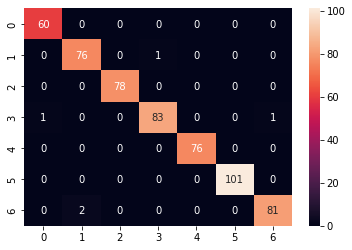

In [28]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn

print(classification_report(y_test,y_pred))

acc = float(accuracy_score(y_test,y_pred))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

Now by calculating the training accuracy and comparing with testing accuracy, we can check for overfitting of data

In [29]:
train_acc = float(svclassifier.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(svclassifier.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

----train accuracy score 100.0 ----
----test accuracy score 99.10714285714286 ----


### Cross-Validation

5-fold cross validation of the dataset with the SVC classifier.

In [30]:
from sklearn.model_selection import cross_val_score

# no. of folds cv = 5
cv_results = cross_val_score(svclassifier, X, y, cv = 5)
print(cv_results)

[0.9875     0.99107143 0.98571429 0.99285714 0.99464286]


## Scaling 

When performing the linear SVM classification, it is often helpful to normalize the training data, for example by subtracting the mean and dividing by the standard deviation, and afterwards scale the test data with the mean and standard deviation of training data.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC


#splitting dataset into train/ test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('SVM', SVC())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set: svc_scaled
svc_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a classifier to the unscaled data
svc_unscaled = SVC(kernel = 'linear').fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(svc_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(svc_unscaled.score(X_test, y_test)))


Accuracy with Scaling: 1.0
Accuracy without Scaling: 0.9982142857142857


### Generalization check
Checking for overfitting or underfitting by comparing the training and testing scores of the model

In [32]:
train_acc = float(svc_scaled.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(svc_scaled.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

----train accuracy score 100.0 ----
----test accuracy score 100.0 ----


In [33]:
scaled_predictions = svc_scaled.predict(X_test)

### Classification reports and Confusion Matrix

              precision    recall  f1-score   support

       angry       1.00      1.00      1.00        86
     disgust       1.00      1.00      1.00        77
        fear       1.00      1.00      1.00        94
       happy       1.00      1.00      1.00        80
     neutral       1.00      1.00      1.00        67
         sad       1.00      1.00      1.00        77
   surprised       1.00      1.00      1.00        79

    accuracy                           1.00       560
   macro avg       1.00      1.00      1.00       560
weighted avg       1.00      1.00      1.00       560

----accuracy score 100.0 ----


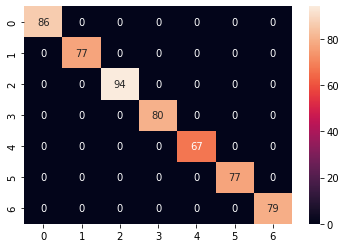

In [34]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn

print(classification_report(y_test,scaled_predictions))

acc = float(accuracy_score(y_test,scaled_predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,scaled_predictions)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()